In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Load Daraset

In [14]:
train_df = pd.read_csv("../data/train_agnews.csv")
test_df = pd.read_csv("../data/test_agnews.csv")

print(f"Train size: {train_df.shape}")
print(f"Test size: {test_df.shape}")
train_df.head()


Train size: (120000, 3)
Test size: (7600, 3)


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [15]:
# Combine title and description into a single text field
train_df["text"] = train_df["Title"] + ". " + train_df["Description"]
train_df["label"] = train_df["Class Index"]
test_df["text"] = test_df["Title"] + ". " + test_df["Description"]
test_df["label"] = test_df["Class Index"]

# Keep only the columns we need
train_df = train_df[["text", "label"]]

test_df = test_df[["text", "label"]]


In [16]:
print(sorted(train_df["label"].unique()))


[1, 2, 3, 4]


## Class Balance

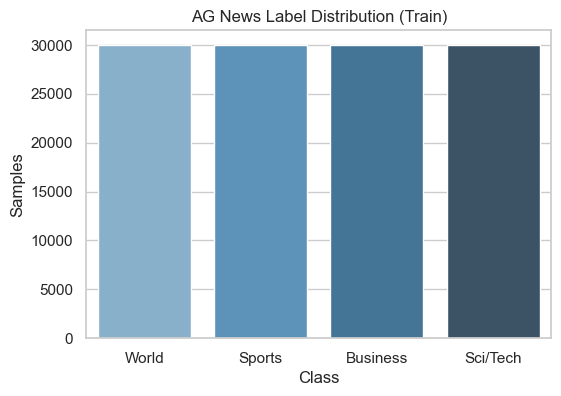

In [21]:
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}


label_counts = train_df["label"].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=[label_map[i] for i in label_counts.index], y=label_counts.values, palette="Blues_d")
plt.title("AG News Label Distribution (Train)")
plt.ylabel("Samples")
plt.xlabel("Class")
plt.show()


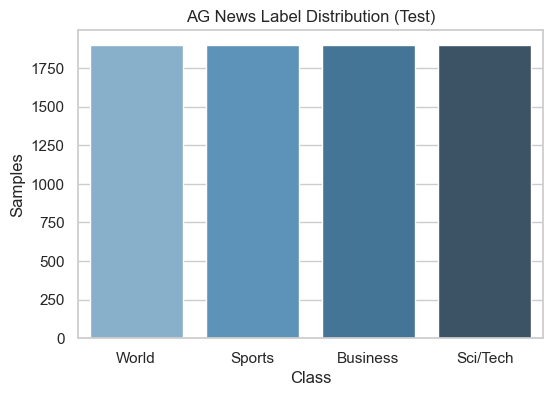

In [23]:
label_counts = test_df["label"].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=[label_map[i] for i in label_counts.index], y=label_counts.values, palette="Blues_d")
plt.title("AG News Label Distribution (Test)")
plt.ylabel("Samples")
plt.xlabel("Class")
plt.show()

## Text Length Distribution

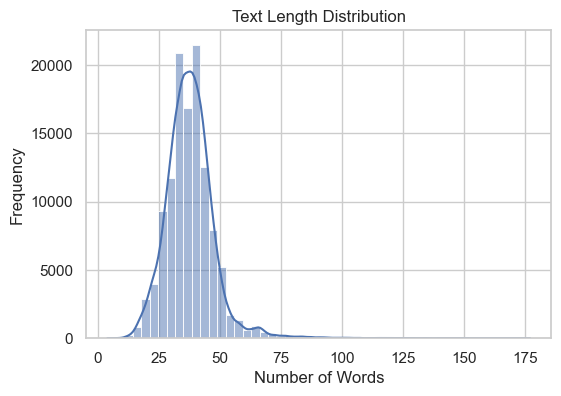

In [24]:
train_df["text_length"] = train_df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(train_df["text_length"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


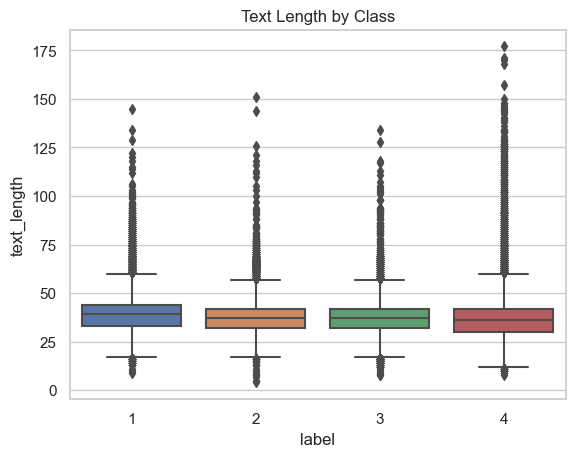

In [27]:
import seaborn as sns
sns.boxplot(x="label", y="text_length", data=train_df)
plt.title("Text Length by Class")
plt.show()


In [26]:
for label_id, label_name in label_map.items():
    print(f"\nExample from class: {label_name}")
    sample = train_df[train_df["label"] == label_id].iloc[0]
    print(sample["text"])



Example from class: World
Venezuelans Vote Early in Referendum on Chavez Rule (Reuters). Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.

Example from class: Sports
Phelps, Thorpe Advance in 200 Freestyle (AP). AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries.

Example from class: Business
Wall St. Bears Claw Back Into the Black (Reuters). Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Example from class: Sci/Tech
'Madden,' 'ESPN' Football Score in Different Ways (Reu

## Unique Word Count

In [29]:
from collections import Counter
from itertools import chain

tokenized = train_df["text"].apply(lambda x: str(x).lower().split())
vocab = Counter(chain.from_iterable(tokenized))
print(f"Unique words in training set: {len(vocab)}")


Unique words in training set: 164438


## Most Frequent Words Per Class

In [35]:
from collections import Counter
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

for label_id, label_name in label_map.items():
    subset = train_df[train_df["label"] == label_id]
    words = " ".join(subset["text"]).lower().split()

    # Filter out stopwords
    filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

    common = Counter(filtered_words).most_common(10)

    print(f"\nTop words in {label_name}:")
    for word, freq in common:
        print(f"  {word}: {freq}")



Top words in World:
  said: 5492
  president: 3900
  iraq: 3854
  us: 3634
  new: 3439
  two: 3305
  minister: 3067
  killed: 2927
  ap: 2781
  will: 2394

Top words in Sports:
  new: 4085
  first: 3840
  will: 3566
  ap: 3119
  game: 2901
  win: 2869
  world: 2836
  team: 2735
  last: 2732
  two: 2629

Top words in Business:
  said: 6655
  new: 6504
  oil: 5998
  us: 5459
  will: 3981
  prices: 3583
  company: 3253
  york: 3014
  percent: 2643
  stocks: 2430

Top words in Sci/Tech:
  new: 7014
  will: 4533
  microsoft: 4478
  said: 3219
  software: 3017
  internet: 2817
  company: 2287
  first: 2102
  space: 2072
  search: 2058


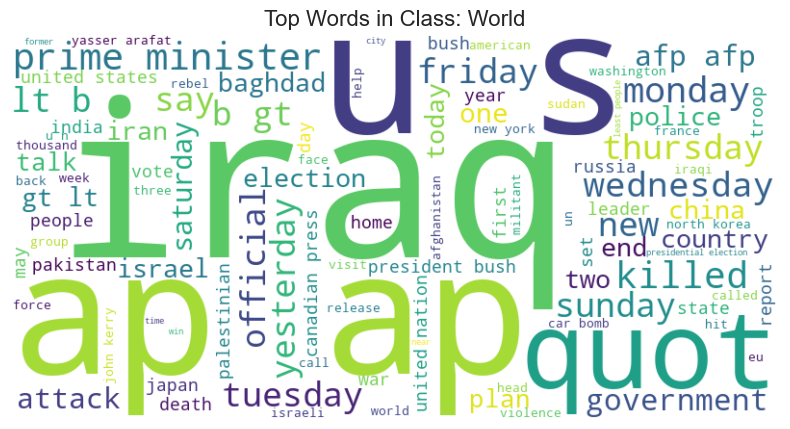

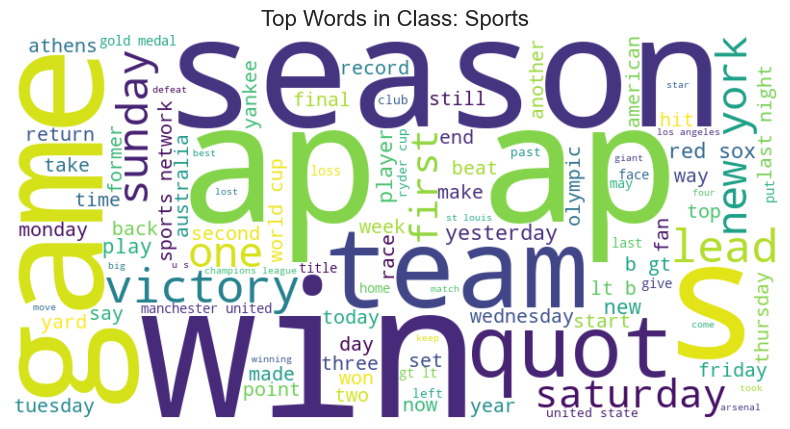

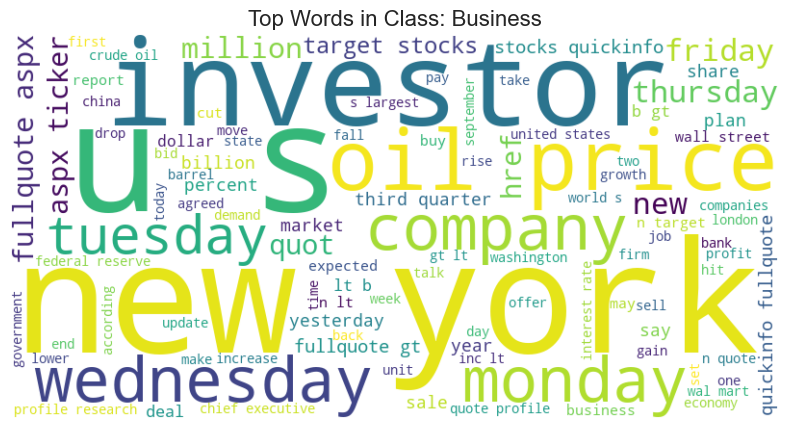

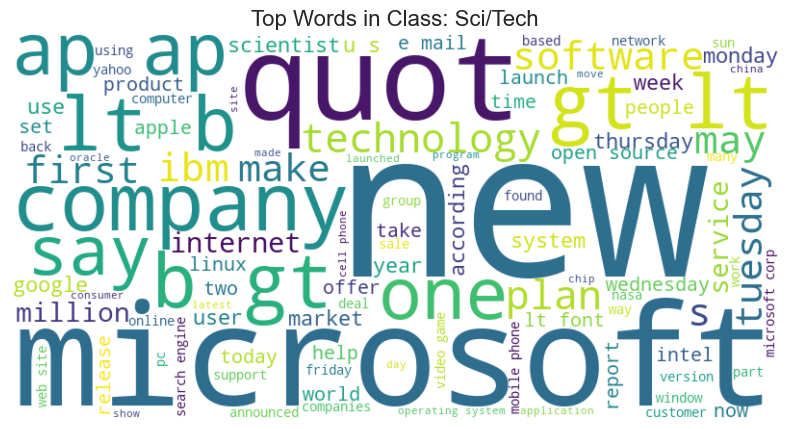

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine default stopwords with some custom ones (optional)
custom_stopwords = set(STOPWORDS).union({"said", "will", "us", "reuters"})
for label_id, label_name in label_map.items():
    subset = train_df[train_df["label"] == label_id]
    text_blob = " ".join(subset["text"].astype(str)).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=custom_stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in Class: {label_name}", fontsize=16)
    plt.show()
